In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

## Data

In [2]:
train = pd.read_csv('../data/log_standardize_prefix/train.csv')
validation = pd.read_csv('../data/log_standardize_prefix/validation.csv')
test = pd.read_csv('../data/log_standardize_prefix/test.csv')

properties = train.columns[1:]

In [3]:
xgbr_predictions_path = '../shallow/predictions/xgbr/'
xgbr_train = pd.read_csv(xgbr_predictions_path + 'train.csv')
xgbr_validation = pd.read_csv(xgbr_predictions_path + 'validation.csv')
xgbr_test = pd.read_csv(xgbr_predictions_path + 'test.csv')

chemprop_predictions_path = '../deep/chemprop/predictions/'
chemprop_train = pd.read_csv(chemprop_predictions_path + 'train.csv')
chemprop_validation = pd.read_csv(chemprop_predictions_path + 'validation.csv')
chemprop_test = pd.read_csv(chemprop_predictions_path + 'test.csv')

unimol_predictions_path = '../deep/unimol-tools/predictions/'
unimol_train = pd.read_csv(unimol_predictions_path + 'train.csv')
unimol_validation = pd.read_csv(unimol_predictions_path + 'validation.csv')
unimol_test = pd.read_csv(unimol_predictions_path + 'test.csv')

In [154]:
property_label = properties[6]
print(property_label)

train_x = np.stack((
    xgbr_train[property_label].to_numpy(), 
    chemprop_train[property_label].to_numpy(), 
    unimol_train[property_label].to_numpy()
), axis=1)
test_x = np.stack((
    xgbr_test[property_label].to_numpy(), 
    chemprop_test[property_label].to_numpy(), 
    unimol_test[property_label].to_numpy()
), axis=1)

train_y = train[property_label]
test_y = test[property_label]

property_cGAMP_Lum


## Training

In [155]:
regressor = LinearRegression(positive=True, fit_intercept=False)
regressor.fit(train_x, train_y)
print(f'Coefficients: {regressor.coef_}')
print(f'Score: {regressor.score(test_x, test_y)}')

Coefficients: [2.00419765 0.         0.        ]
Score: 0.12787887159228395


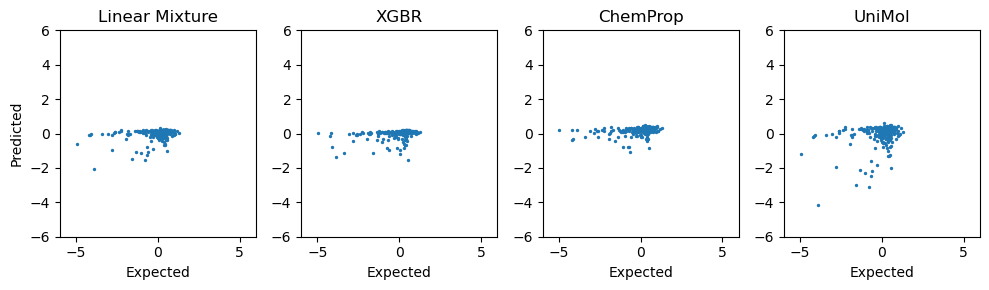

In [156]:
fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(10, 3))

ax0.scatter(test_y, test_x[:, 0], s=2)
ax0.set_title('Linear Mixture')
ax0.set_xlim((-6, 6))
ax0.set_ylim((-6, 6))
ax0.set_xlabel('Expected')
ax0.set_ylabel('Predicted')

ax1.scatter(test_y, test_x[:, 1], s=2)
ax1.set_title('XGBR')
ax1.set_xlim((-6, 6))
ax1.set_ylim((-6, 6))
ax1.set_xlabel('Expected')

ax2.scatter(test_y, test_x[:, 2], s=2)
ax2.set_title('ChemProp')
ax2.set_xlim((-6, 6))
ax2.set_ylim((-6, 6))
ax2.set_xlabel('Expected')

ax3.scatter(test_y, regressor.predict(test_x), s=2)
ax3.set_title('UniMol')
ax3.set_xlim((-6, 6))
ax3.set_ylim((-6, 6))
ax3.set_xlabel('Expected')

plt.tight_layout()